# How to create a Torch Dataset from Numpy arrays

* [Refactor with Dataset](https://pytorch.org/tutorials/beginner/nn_tutorial.html#refactor-using-dataset)

In [12]:
from pathlib import Path
import requests
import pickle
import gzip
import torch
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# Load data as numpy

In [3]:
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [4]:
x_train.shape

(50000, 784)

# Convert numpy arrays to Tensors

In [7]:
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

# Combine Tensors into a Dataset

Both x_train and y_train can be combined in a single TensorDataset.


In [8]:
train_ds = TensorDataset(x_train, y_train)

In [11]:
image, label = train_ds[0]

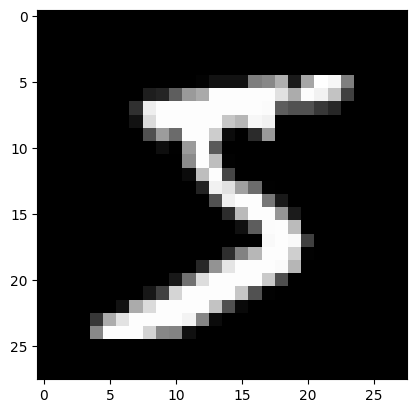

In [15]:
plt.imshow(image.squeeze().reshape(28, 28), cmap="gray")

In [18]:
!rm -rf ./data